# **Практическая работа №7. Применение методов машинного обучения для решения задач классификации текстов. Метод Наивного Байеса. Метод опорных векторов**

## Задание 0. Найдите в глобальной сети или соберите свой датасет для классификации текстов (Пример: новости -> рубрики, комментарии в соц. сетях -> характер, )

* Количество классов в датасете должно превышать 2
* Язык текста в датасете: русский

- ### Пример датасетов: [Russian Texts](https://www.kaggle.com/datasets?search=text+classification+russian)

### Загрузите датасет

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/content/sport.csv')
# https://www.kaggle.com/datasets/mikhailma/russian-social-media-text-classification?select=train.csv
df.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


In [ ]:
#0 легкая атлетика,
#1 автоспорт,
#2 баскетбол,
#3 настольные игры,
#4 киберспорт,
#5 экстремальный,
#6 футбол,
#7 хоккей,
#8 боевые искусства,
#9 мотоспорт,
#10 теннис,
#11 волейбол,
#12 зимний_спорт

### Разделите данные на обучающую и валидационную выборки

In [ ]:
X = df['text']
Y = df['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

### При выполении дальнейших заданий поэксперементируйте с методами векторизации текста:


1. [Bag of Words](https://habr.com/ru/companies/mlclass/articles/270591/) (BOW): Bag of Words представляет текст как вектор, где каждый элемент обозначает количество вхождений конкретного слова в тексте. Процесс включает в себя создание словаря всех уникальных слов в корпусе текстов и подсчет частоты встречаемости каждого слова в отдельных текстах.

2. [TF-IDF](https://habr.com/ru/companies/otus/articles/755772/) (Term Frequency-Inverse Document Frequency): TF-IDF учитывает не только количество вхождений слова в текст, но и частоту его встречаемости в других текстах. Он вычисляет вес слова, умножая его частоту встречаемости (term frequency) на обратную частоту документа (inverse document frequency). Это позволяет снизить вес наиболее часто встречающихся слов, которые могут быть менее информативными.

3. Word Embeddings (например, [Word2Vec](https://habr.com/ru/articles/446530/) и [GloVe](https://jonathan-hui.medium.com/nlp-word-embedding-glove-5e7f523999f6)): Word Embeddings используют нейронные сети для создания векторных представлений слов, которые учитывают семантическую близость между словами. Нейронные сети обучаются на больших текстовых корпусах и захватывают семантические отношения между словами, что позволяет представить слова в векторном пространстве.

4. One-Hot Encoding: One-Hot Encoding преобразует каждое слово в уникальный вектор, где все элементы равны нулю, за исключением одного, который равен единице. Каждый вектор соответствует отдельному слову и используется для представления его в пространстве признаков.

5. [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): Count Vectorizer подсчитывает количество раз, которое каждое слово встречается в тексте. Он создает вектор, в котором каждый элемент соответствует количеству вхождений конкретного слова в текст.

6. [Hashing Vectorizer](https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/): Hashing Vectorizer преобразует каждое слово в уникальный числовой идентификатор с помощью хеширования. Он использует хеш-функцию для преобразования слова в числовое значение, которое затем используется в векторном представлении.

7. [Doc2Vec](https://habr.com/ru/articles/599513/): Doc2Vec является расширением метода Word2Vec и позволяет получить векторное представление не только отдельных слов, но и целых документов или текстов. Алгоритм обучает нейронную сеть, которая учитывает контекст и порядок слов в предложении, чтобы получить векторное представление документа. Это позволяет сравнивать и измерять семантическую близость между целыми текстовыми документами.

#### Оцените влияние разных методов на конечный результат

In [ ]:
# Bag of Words (BOW)
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [ ]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()
# Преобразуем тексты в векторы признаков
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer_tfidf.transform(X_test).toarray()

# Создаем и обучаем GaussianNB
#gnb = GaussianNB()
#gnb.fit(X_train_tfidf, y_train)

## Задание 1. Обучите модель классификатора Naive Bayes для решения поставленной задачи, используя пайплайн и подбор оптимальных параметров

In [ ]:
# Определение шагов конвейера
pipeline = Pipeline([
    ('bow_vectorizer', CountVectorizer()),   # Преобразование текста в числовые признаки
    ('classifier', MultinomialNB())  # Мультиномиальный наивный байесовский классификатор
])

In [ ]:
from sklearn.model_selection import GridSearchCV
# Определение параметров для подбора
param_grid = {
    'bow_vectorizer__ngram_range': [(1, 1), (1, 2)],   # Униграммы* или униграммы+биграммы*
    'classifier__alpha': [0.5, 1.0]                # Параметр сглаживания для Naive Bayes
}
# Создание объекта GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшая комбинация параметров
print(f'Лучшие параметры: {grid_search.best_params_}')

Лучшие параметры: {'bow_vectorizer__ngram_range': (1, 1), 'classifier__alpha': 0.5}


### Вывод матрицы ошибок:

In [ ]:
y_pred = grid_search.predict(X_test)

<Axes: >

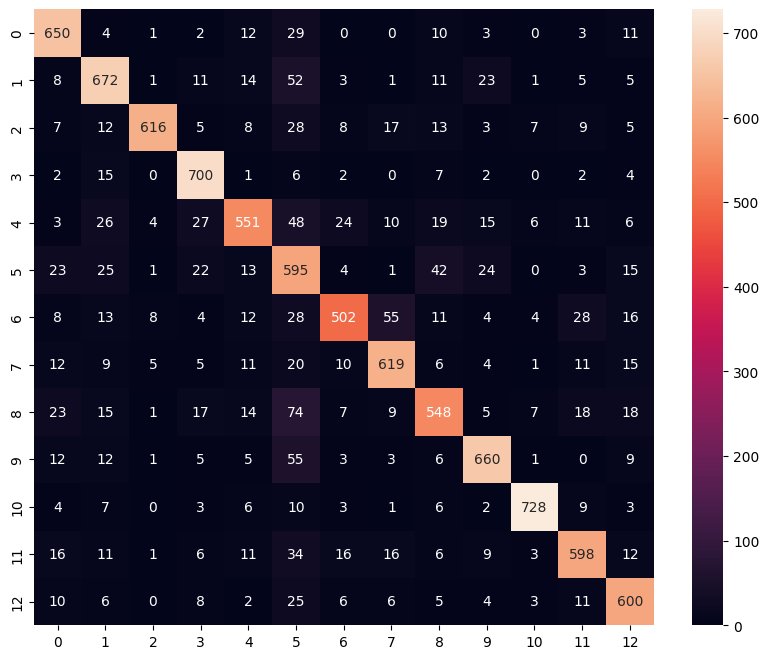

In [ ]:
conf_mat_NB=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_NB,annot=True,fmt='d')

### Оценка точности:

In [ ]:
naive_acc=accuracy_score(y_test,y_pred)
naive_acc

0.8300464636035105

Лучшие параметры: {'classifier__alpha': 0.5, 'vectorizer_tfidf__ngram_range': (1, 1)}


0.8406814661848219

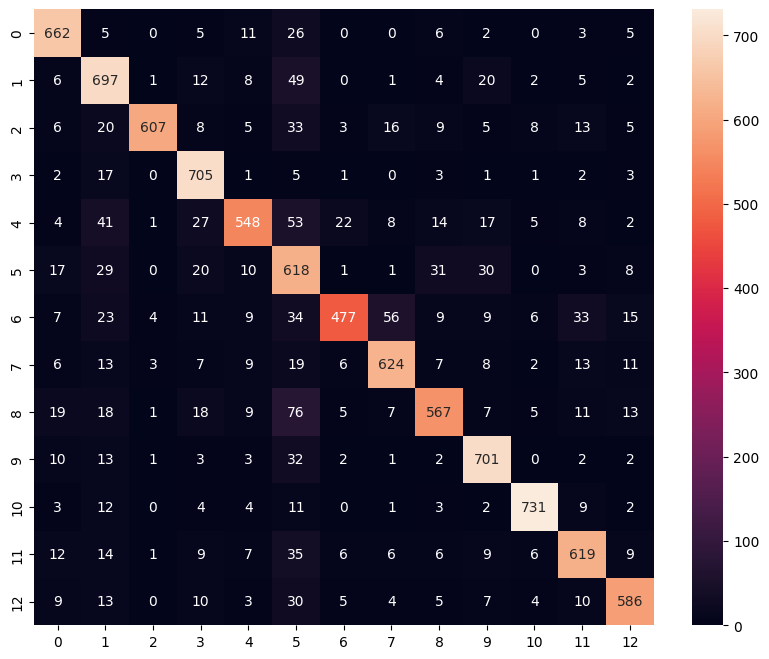

In [ ]:
# Определение шагов конвейера
pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),   # Преобразование текста в числовые признаки
    ('classifier', MultinomialNB())  # Мультиномиальный наивный байесовский классификатор
])

from sklearn.model_selection import GridSearchCV
# Определение параметров для подбора
param_grid = {
    'vectorizer_tfidf__ngram_range': [(1, 1), (1, 2)],   # Униграммы* или униграммы+биграммы*
    'classifier__alpha': [0.5, 1.0]                # Параметр сглаживания для Naive Bayes
}
# Создание объекта GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшая комбинация параметров
print(f'Лучшие параметры: {grid_search.best_params_}')

y_pred = grid_search.predict(X_test)

conf_mat_NB=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_NB,annot=True,fmt='d')

naive_acc=accuracy_score(y_test,y_pred)
naive_acc

## Задание 2. Обучите модель SVM (метод опорных векторов) для решения поставленной задачи, используя пайплайны и подбор оптимальных параметров

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

# Используем подвыборку данных для ускорения
X_train_sample = X_train.sample(frac=0.4, random_state=1)
y_train_sample = y_train[X_train_sample.index]

# Определение пайплайна
pipeline = Pipeline([
    ('bow_vectorizer', CountVectorizer()),  # Преобразование текста в числовые признаки
    ('classifier', SVC())                   # SVM классификатор
])

# Упрощенная сетка параметров
param_dist = {
    'bow_vectorizer__ngram_range': [(1, 1), (1, 2)],  # Униграммы или униграммы+биграммы
    'classifier__C': [0.1, 1],                        # Параметр регуляризации
    'classifier__kernel': ['rbf'],                    # Только ядро 'rbf'
    'classifier__gamma': ['scale', 'auto']            # Основные значения для gamma
}

# Используем RandomizedSearchCV с ограниченным числом итераций
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=6, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train_sample, y_train_sample)

# Вывод лучших параметров
print(f'Лучшие параметры: {random_search.best_params_}')


Лучшие параметры: {'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 1, 'bow_vectorizer__ngram_range': (1, 1)}


### Вывод матрицы ошибок:

<Axes: >

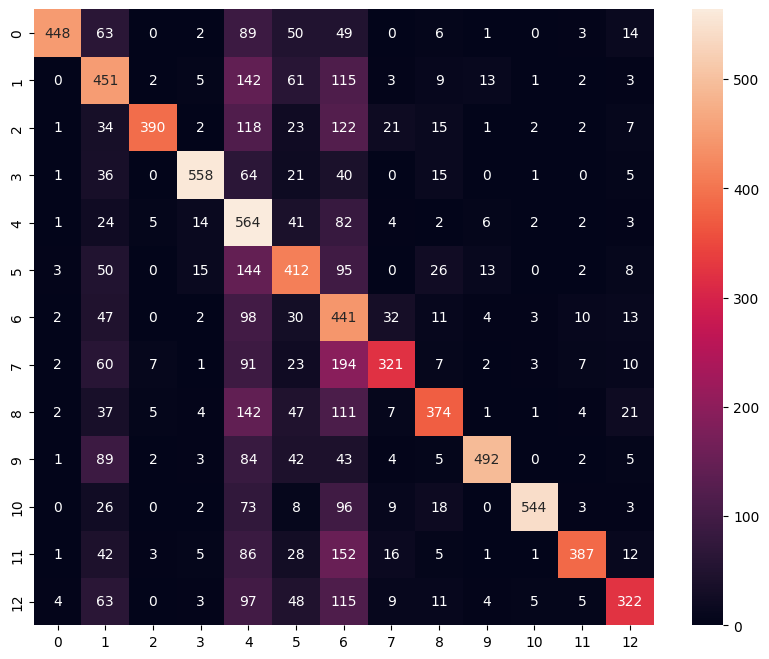

In [ ]:
y_pred = random_search.predict(X_test)

conf_mat_SVM=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_SVM,annot=True,fmt='d')

### Оценка точности:

In [ ]:
SVM_acc=accuracy_score(y_test,y_pred)
SVM_acc

0.5889519876097057

## Задание 3. Обучите модель классификатора Decision Tree Classifier для решения поставленной задачи

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('bow_vectorizer', CountVectorizer()),   # Преобразование текста в числовые признаки
    ('classifier', DecisionTreeClassifier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow_vectorizer', CountVectorizer()),
                ('classifier', DecisionTreeClassifier())])

### Вывод матрицы ошибок:

<Axes: >

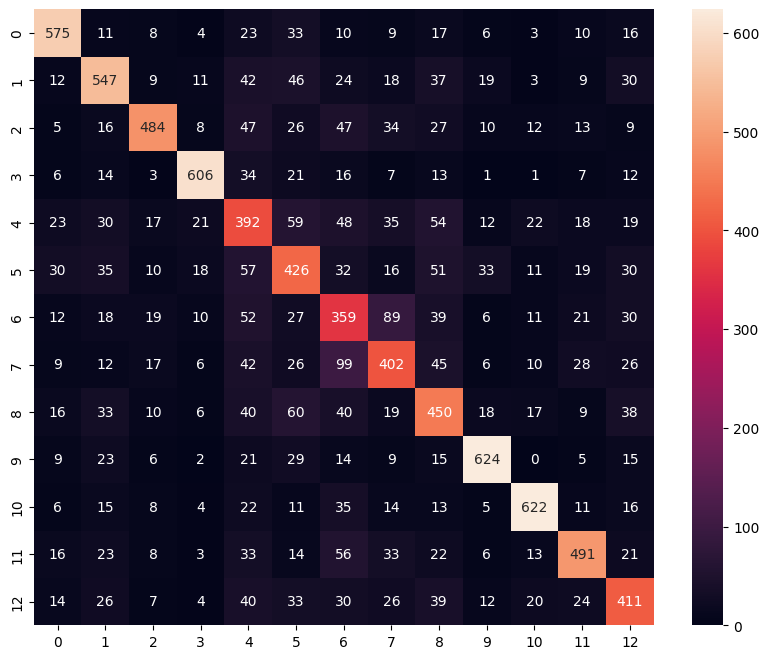

In [ ]:
y_pred = pipeline.predict(X_test)
conf_mat_DTC = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_DTC,annot=True,fmt='d')

### Оценка точности:

In [ ]:
DTC_acc=accuracy_score(y_test,y_pred)
DTC_acc

0.6596799173980382

## Задание 4. Обучите модель классификатора Random Forest Classifier для решения поставленной задачи

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow_vectorizer', CountVectorizer()),   # Преобразование текста в числовые признаки
    ('classifier', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow_vectorizer', CountVectorizer()),
                ('classifier', RandomForestClassifier())])

### Вывод матрицы ошибок:

<Axes: >

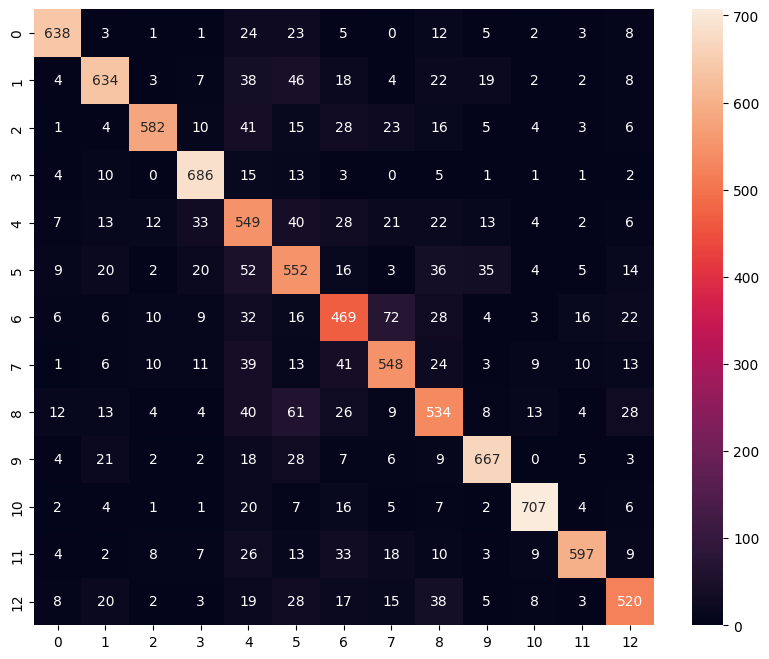

In [ ]:
y_pred = pipeline.predict(X_test)
conf_mat_RFC = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_RFC,annot=True,fmt='d')

### Оценка точности:

In [ ]:
RFC_acc=accuracy_score(y_test,y_pred)
RFC_acc

0.7932885906040269

## Подведите общие итоги и сделайте выводы

In [ ]:
SVM_acc
'SVM'

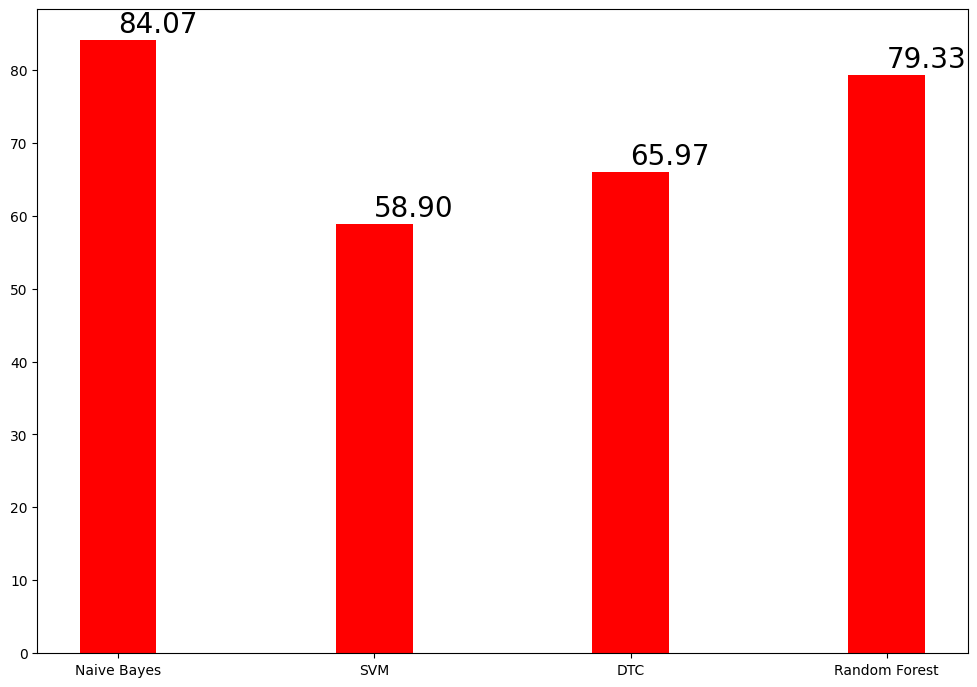

In [ ]:
menMeans = np.array([naive_acc,SVM_acc,DTC_acc,RFC_acc])*100
ind = ['Naive Bayes', 'SVM', 'DTC','Random Forest']
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(ind,menMeans,width=0.3,color ='red')
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

      Ваши выводы:
      самые лучшие показатели у Naive Bayes, худшие - SVM, эта модель долго обучалась, однако не оправдала ожиданий по точности, так как пришлось сократить количество данных для обучения